In [1]:
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np

from lsst.daf.butler import Butler
from lsst.l1dbproto import geom

import plot_regions

%matplotlib widget

In [2]:
butler_config = "embargo"
butler = Butler.from_config(butler_config)

In [3]:
figs = []

In [4]:
instrument = "LSSTCam"
visit_records = {}
for day_obs in list(range(20250610, 20250631)) + [20250701]:
    records = butler.query_dimension_records(
        "visit", instrument=instrument, where=f"day_obs = {day_obs}", explain=False
    )
    if records:
        visit_records[day_obs] = records

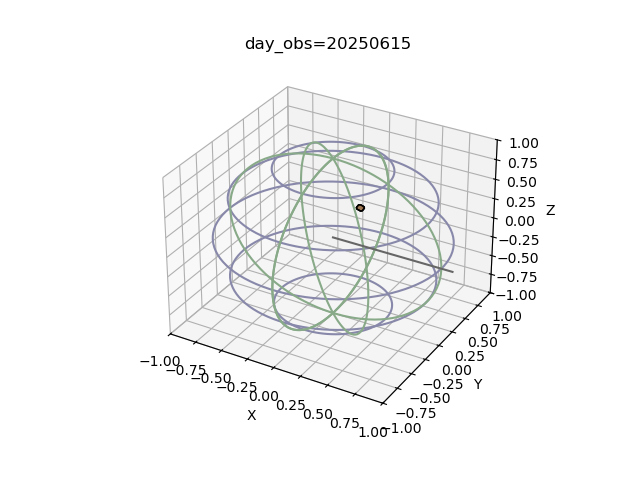

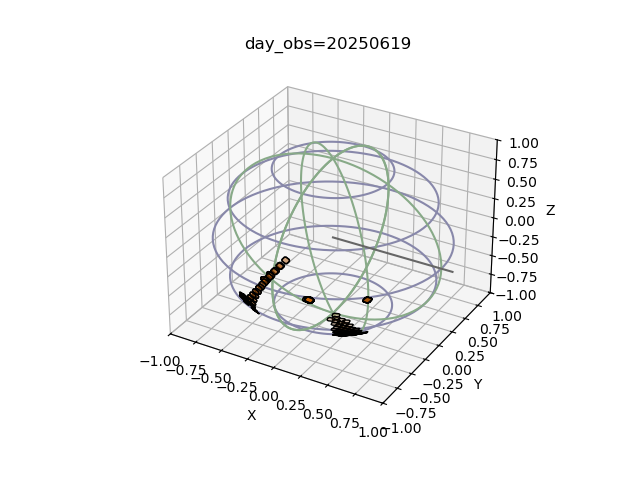

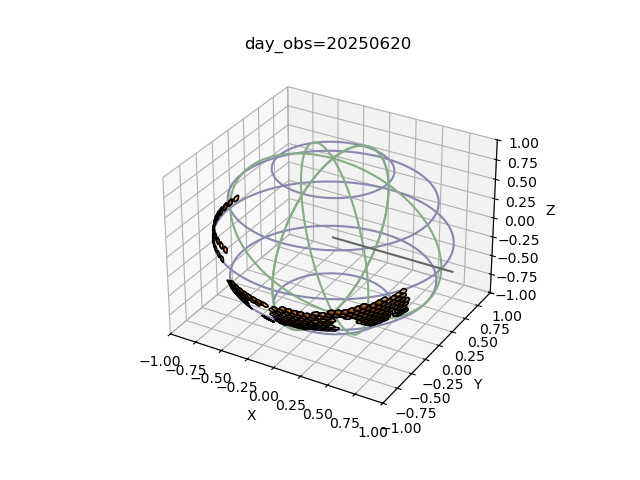

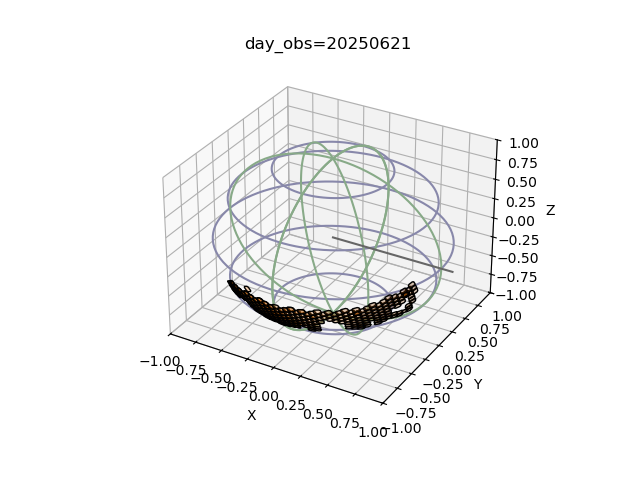

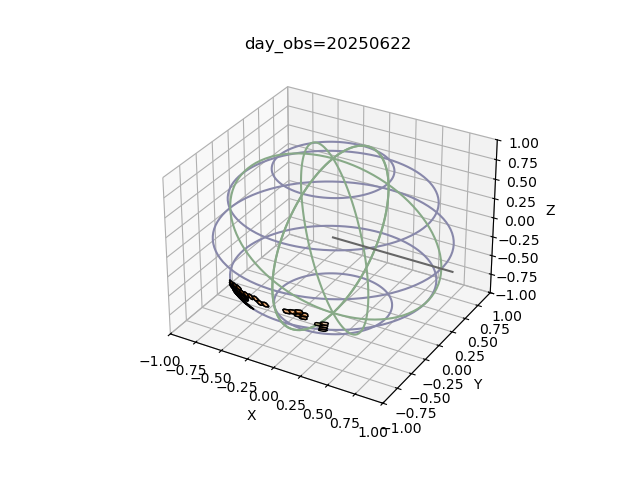

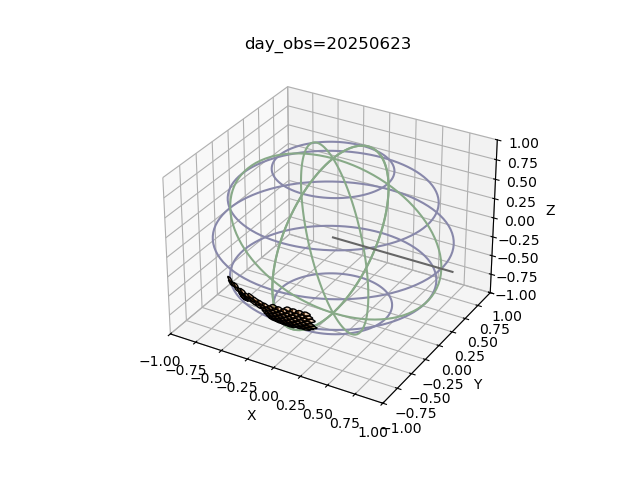

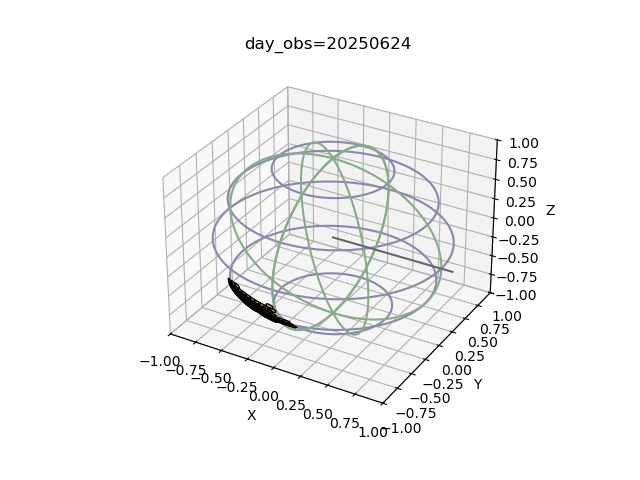

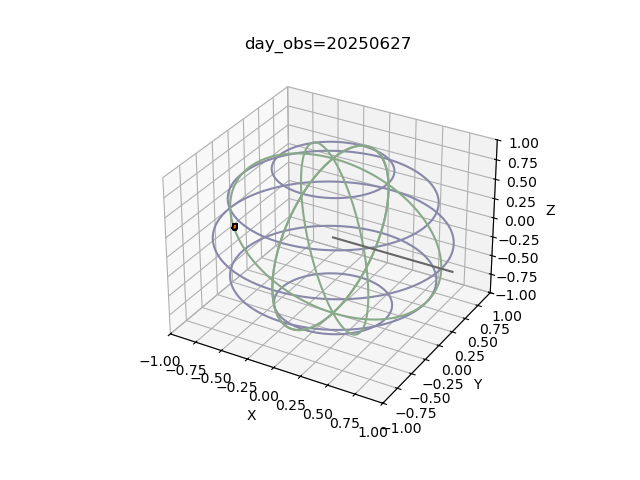

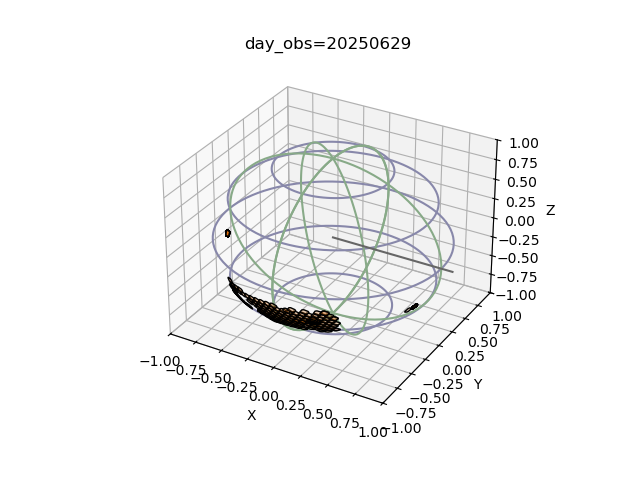

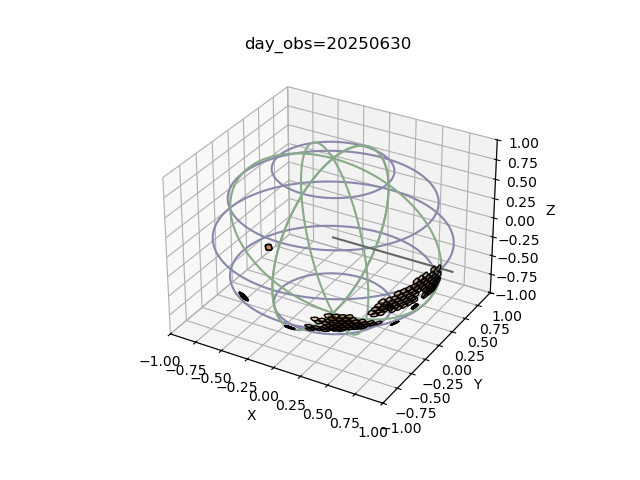

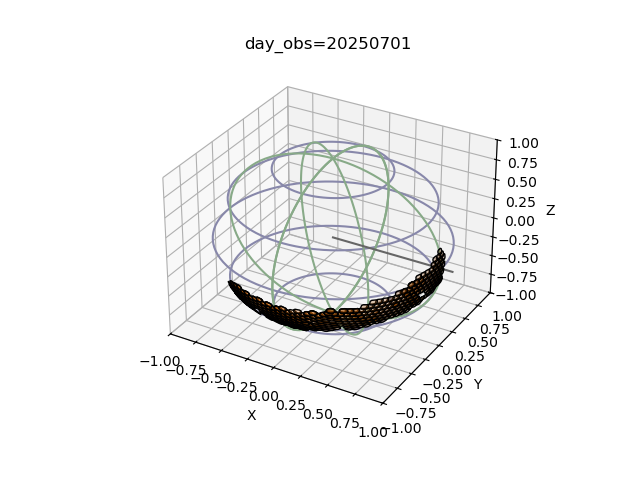

In [5]:
for fig in figs:
    plt.close(fig)
figs = []

for day_obs, records in visit_records.items():
    fig = plot_regions.plot_polygons_3d(day_obs, (visit.region for visit in records))
    figs.append(fig)
    

/sdf/data/rubin/user/salnikov/apdb/l1dbproto-notebooks/plot_regions.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = pyplot.figure()


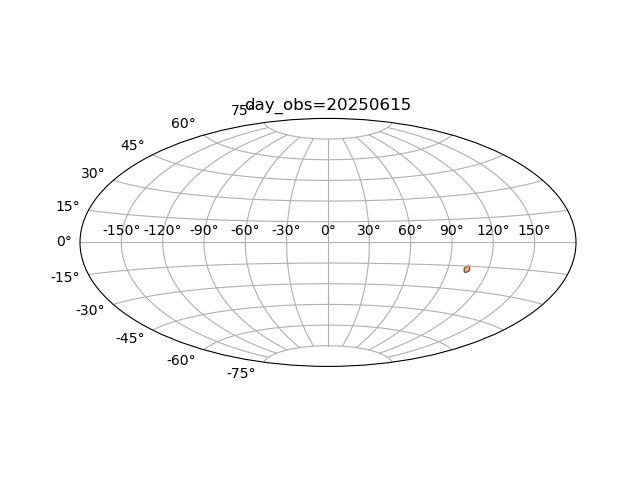

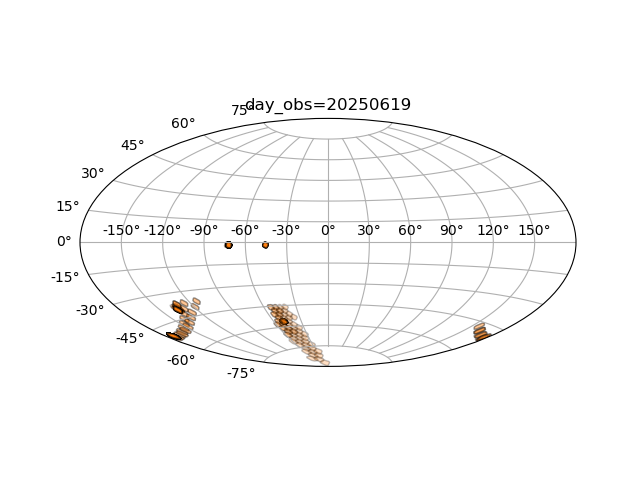

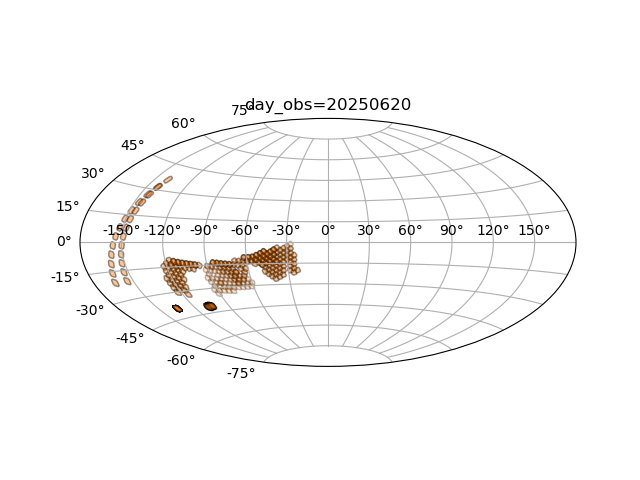

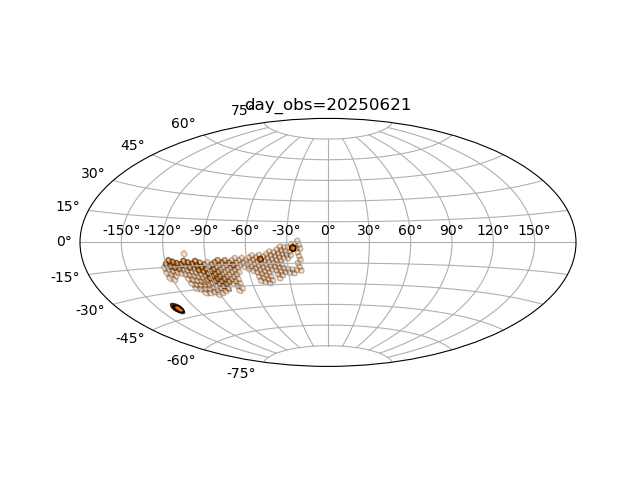

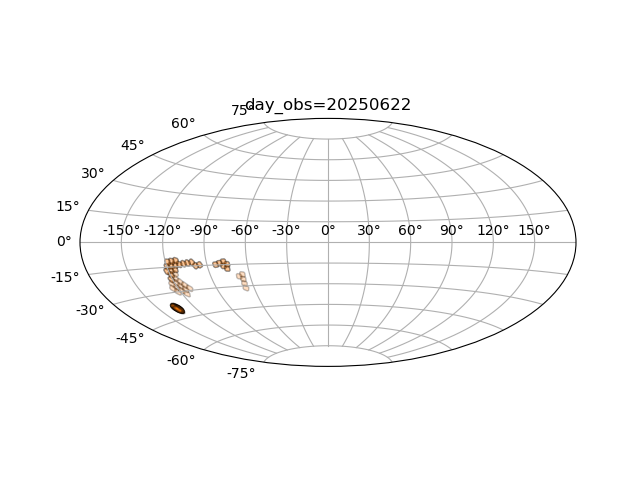

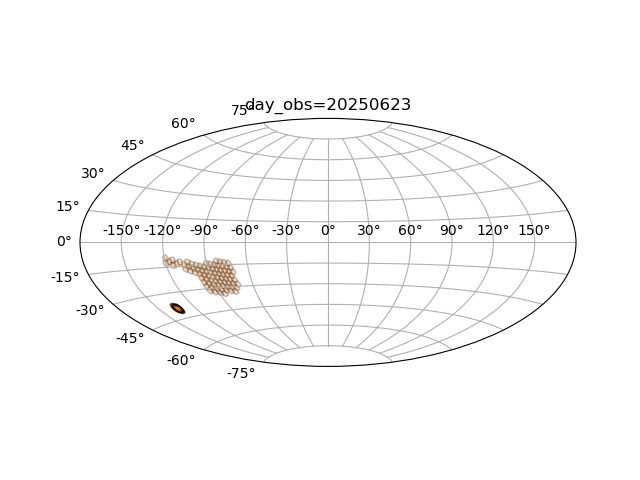

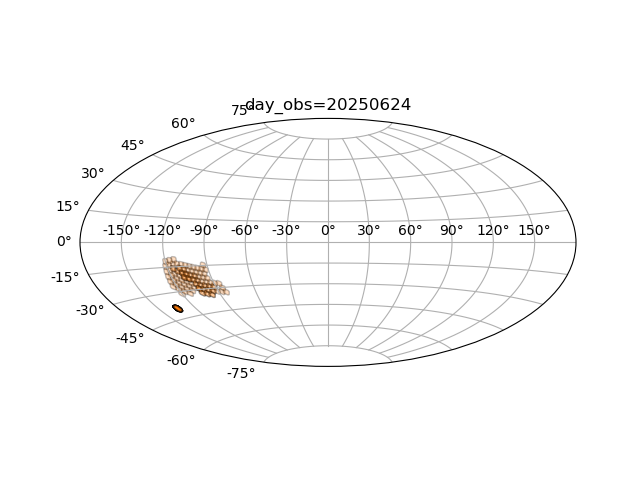

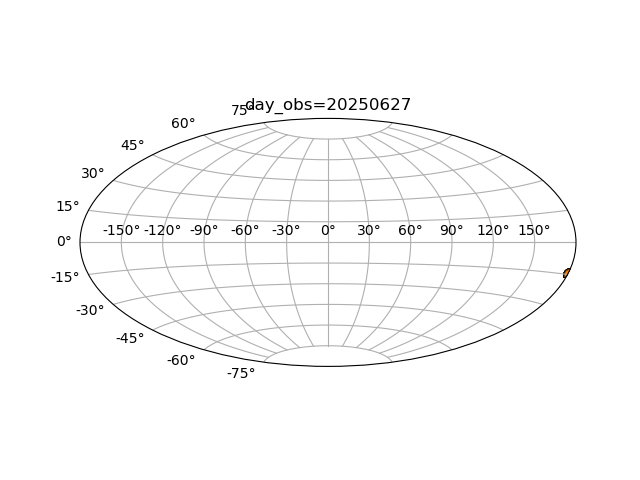

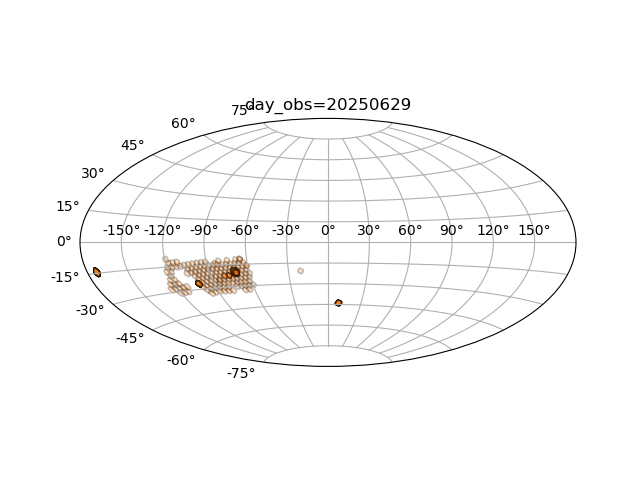

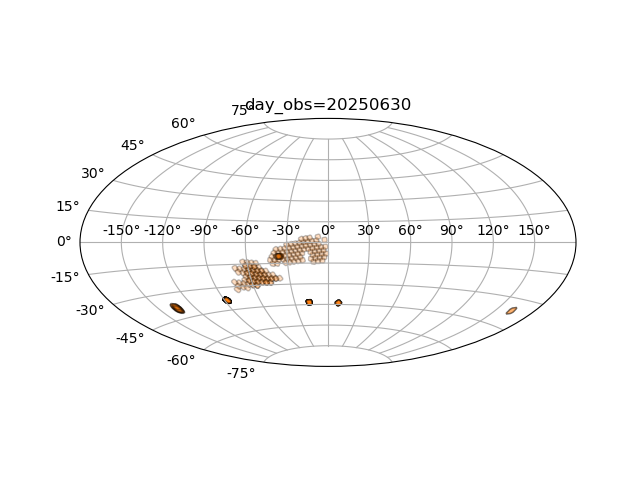

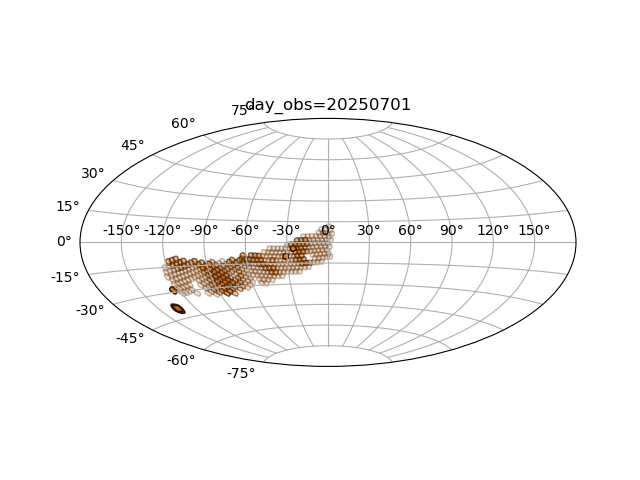

In [6]:
for day_obs, records in visit_records.items():
    fig = plot_regions.plot_polygons_2d(day_obs, (visit.region for visit in records))
    figs.append(fig)

In [7]:
all_visit_records = itertools.chain.from_iterable(visit_records.values())

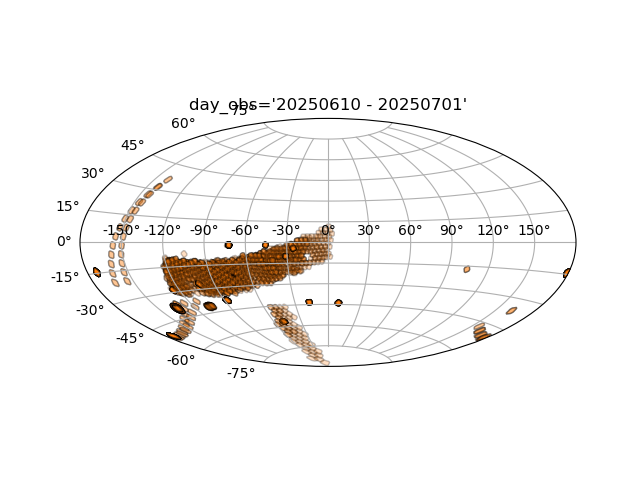

In [8]:
fig = plot_regions.plot_polygons_2d("20250610 - 20250701", (visit.region for visit in all_visit_records))
figs.append(fig)

In [9]:
# Find one visit close to ra=0, dec=0
visit_id = None
for visit_record in visit_records[20250701]:
    center = visit_record.region.getCentroid()
    if abs(center.y()) < 0.02 and abs(center.z()) < 0.02:
        visit_id = visit_record.id
        print(center)
        break

[0.9999433660214377, -0.0012767374553634425, -0.010565731928607092]


In [10]:
visit_id

2025070100693

In [11]:
vdrs = butler.query_dimension_records(
    "visit_detector_region", instrument=instrument, where=f"visit = {visit_id}", explain=False, limit=None
)

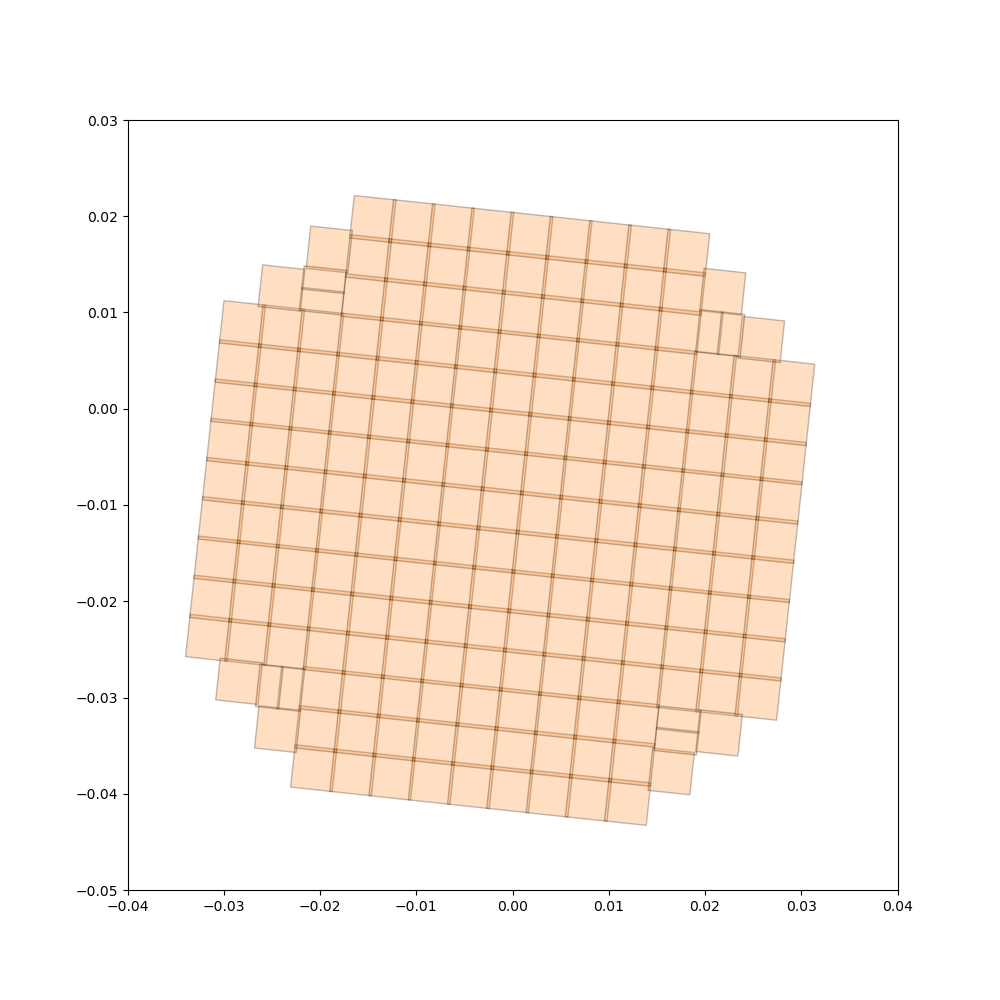

In [12]:
detector_polygons = plot_regions.polygons_to_poly_radec(vdr.region for vdr in vdrs)
fig = plt.figure(figsize=(10, 10))
figs.append(fig)
ax = fig.add_subplot()
ax.set_xlim(-0.04, 0.04)
ax.set_ylim(-0.05, 0.03)
ax.set_box_aspect(1)
ax.add_collection(detector_polygons)
ax.grid(False)

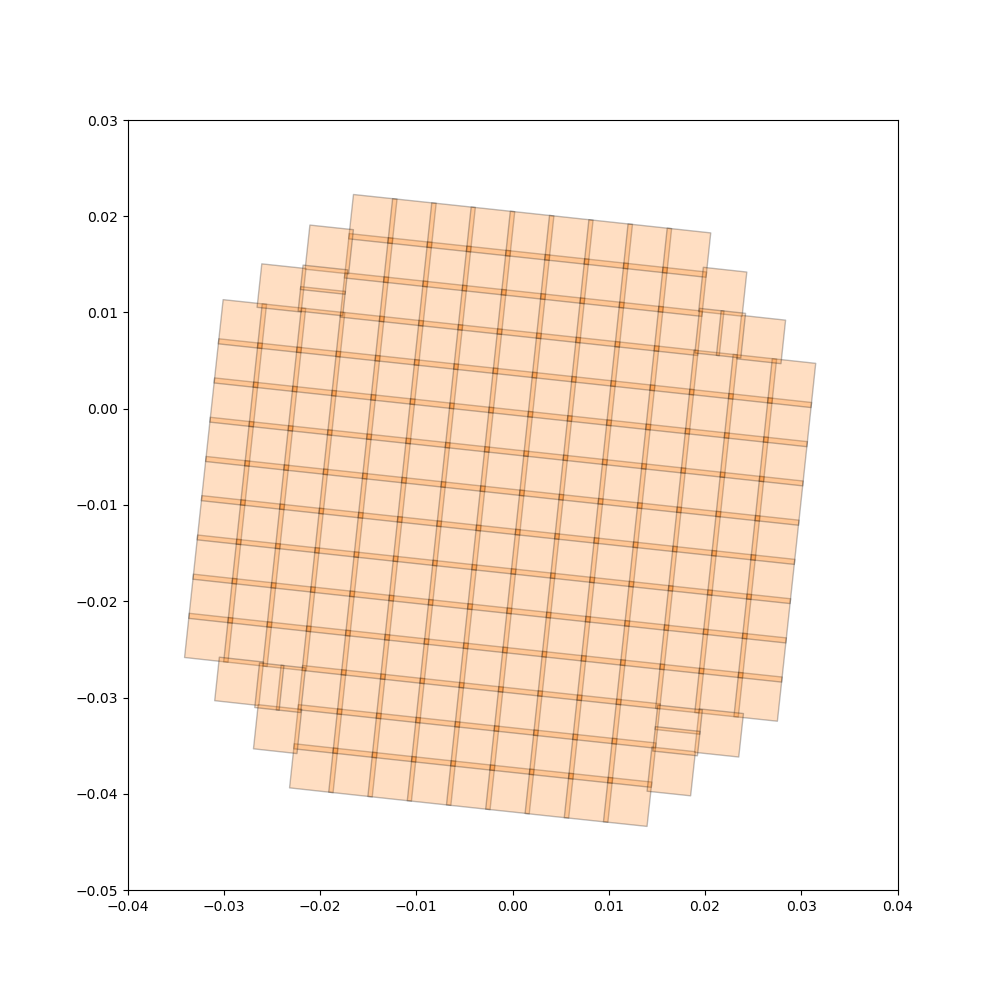

In [13]:
detector_polygons = plot_regions.polygons_to_poly_radec(plot_regions.padded_region(vdr.region) for vdr in vdrs)
fig = plt.figure(figsize=(10, 10))
figs.append(fig)
ax = fig.add_subplot()
ax.set_xlim(-0.04, 0.04)
ax.set_ylim(-0.05, 0.03)
ax.set_box_aspect(1)
ax.add_collection(detector_polygons)
ax.grid(False)

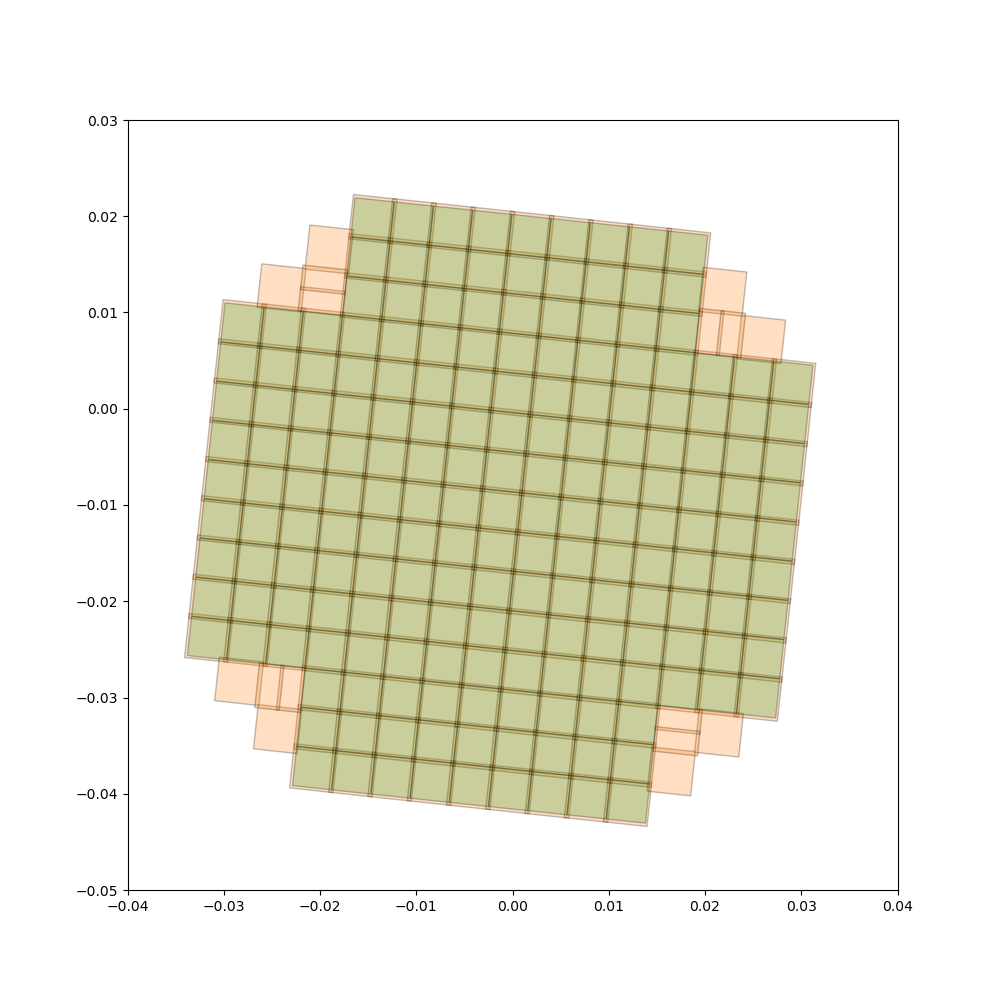

In [14]:
detector_polygons = plot_regions.polygons_to_poly_radec(plot_regions.padded_region(vdr.region) for vdr in vdrs)
direction = np.array([center.x(), center.y(), center.z()])
tiles = [tile[2] for tile in geom.make_tiles(3.52 / 180. * math.pi, -3, direction=direction, rot_rad=-0.107)]
tile_polygons = plot_regions.polygons_to_poly_radec(tiles, facecolors="C2")
fig = plt.figure(figsize=(10, 10))
figs.append(fig)
ax = fig.add_subplot()
ax.set_xlim(-0.04, 0.04)
ax.set_ylim(-0.05, 0.03)
ax.set_box_aspect(1)
ax.add_collection(detector_polygons)
ax.add_collection(tile_polygons)
ax.grid(False)

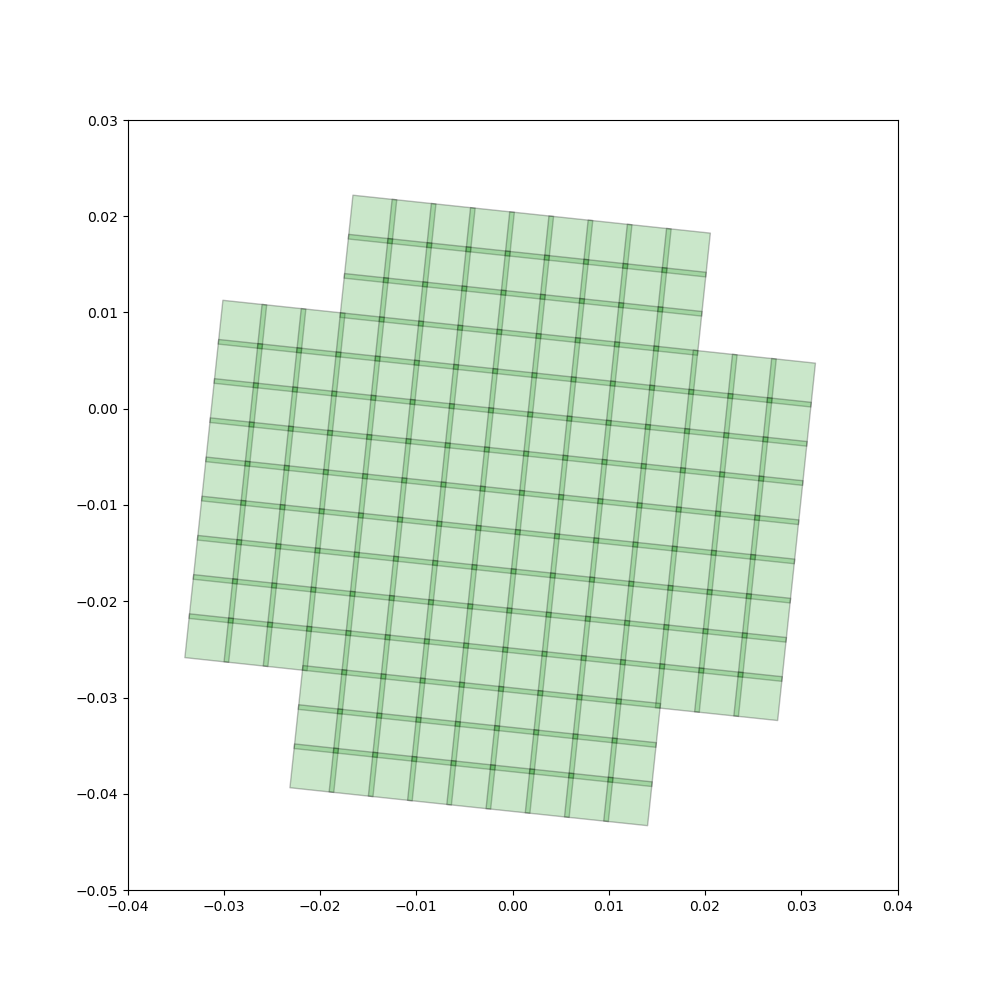

In [15]:
direction = np.array([center.x(), center.y(), center.z()])
tiles = [plot_regions.padded_region(tile[2], 50.) for tile in geom.make_tiles(3.52 / 180. * math.pi, -3, direction=direction, rot_rad=-0.107)]
tile_polygons = plot_regions.polygons_to_poly_radec(tiles, facecolors="C2")
fig = plt.figure(figsize=(10, 10))
figs.append(fig)
ax = fig.add_subplot()
ax.set_xlim(-0.04, 0.04)
ax.set_ylim(-0.05, 0.03)
ax.set_box_aspect(1)
ax.add_collection(tile_polygons)
ax.grid(False)